In [66]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
cid = 'b2fc78511cc341f19681f390189b09c0'
secret = '849c067e4c9348f8884a14964381e73a'

In [68]:
client_credential = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credential)

In [69]:
artist = []
track = []
popularity = []
track_id = []
release_date = []

for i in range(0, 1000, 50):
    result = sp.search(q='year:2020', type='track', limit=50, offset=i)
    for i, t in enumerate(result['tracks']['items']):
        artist.append(t['artists'][0]['name'])
        track.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])
        release_date.append(t['album']['release_date'])

In [70]:
df_tracks = pd.DataFrame({
    'track_id': track_id,
    'artist': artist,
    'track': track,
    'popularity': popularity,
    'release_date': release_date
})

df_tracks

,track_id,artist,track,popularity,release_date
0,463CkQjx2Zk1yXoBuierM9,Dua Lipa,Levitating (feat. DaBaby),92,2020-10-01
1,08ejYlzduA6O82FJgnFKQz,Leonardo Makno,Year 2020,33,2020-10-29
2,6tDDoYIxWvMLTdKpjFkc1B,Kali Uchis,telepatía,92,2020-12-04
3,457sndKohlwTU6dW6amBMU,Tame Impala,Alter Ego - 2020 Mix,55,2021-04-30
4,0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,Blinding Lights,94,2020-03-20
...,...,...,...,...,...
995,607a1hiIZ0IFkSVOgvcgcT,Armin van Buuren,This I Vow,12,2020-12-11
996,0ri0Han4IRJhzvERHOZTMr,Pink Sweat$,At My Worst,82,2020-07-17
997,6evuFziA2MjVfWwavmHdZu,Taylor Torrence,If We Say Goodbye,11,2020-12-11
998,4CzhtKifG867Lu5DNQVBSA,Playboi Carti,Vamp Anthem,70,2020-12-25


In [71]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   track_id      1000 non-null   object
 1   artist        1000 non-null   object
 2   track         1000 non-null   object
 3   popularity    1000 non-null   int64 
 4   release_date  1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


In [91]:
df_tracks['release_date'] = pd.to_datetime(df_tracks['release_date'])
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   track_id      979 non-null    object        
 1   artist        979 non-null    object        
 2   track         979 non-null    object        
 3   popularity    979 non-null    int64         
 4   release_date  979 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 45.9+ KB


In [73]:
'''Check duplicate'''

group = df_tracks.groupby(['artist', 'track'], as_index=True).size()

group[group > 1].count()

20

In [74]:
df_tracks.drop_duplicates(subset=['artist', 'track'], inplace=True)

In [75]:
'''Checking duplicate'''

df_tracks[df_tracks.duplicated(subset=['artist', 'track'], keep=False)].count()

track_id        0
artist          0
track           0
popularity      0
release_date    0
dtype: int64

In [76]:
row = []
batchsize = 100
none_counter = 0

for i in range(0, len(df_tracks['track_id']), batchsize):
    batch = df_tracks['track_id'][i:i+batchsize]
    feature_result = sp.audio_features(batch)
    for i, t in enumerate(feature_result):
        if t == None:
            none_counter += 1
        else:
            row.append(t)

print(f'Number of track where no audio features: {none_counter}')

Number of track where no audio features: 0


In [77]:
print(len(row))

979


In [78]:
df_audio_feature = pd.DataFrame.from_dict(row, orient='columns')
df_audio_feature

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.702,0.825,6,-3.787,0,0.0601,0.008830,0.000000,0.0674,0.9150,102.977,audio_features,463CkQjx2Zk1yXoBuierM9,spotify:track:463CkQjx2Zk1yXoBuierM9,https://api.spotify.com/v1/tracks/463CkQjx2Zk1...,https://api.spotify.com/v1/audio-analysis/463C...,203064,4
1,0.805,0.417,4,-11.722,0,0.0462,0.508000,0.020100,0.0903,0.5480,129.984,audio_features,08ejYlzduA6O82FJgnFKQz,spotify:track:08ejYlzduA6O82FJgnFKQz,https://api.spotify.com/v1/tracks/08ejYlzduA6O...,https://api.spotify.com/v1/audio-analysis/08ej...,133281,4
2,0.653,0.524,11,-9.016,0,0.0502,0.112000,0.000000,0.2030,0.5530,83.970,audio_features,6tDDoYIxWvMLTdKpjFkc1B,spotify:track:6tDDoYIxWvMLTdKpjFkc1B,https://api.spotify.com/v1/tracks/6tDDoYIxWvML...,https://api.spotify.com/v1/audio-analysis/6tDD...,160191,4
3,0.408,0.903,0,-2.924,1,0.0561,0.002560,0.000821,0.1170,0.3680,128.942,audio_features,457sndKohlwTU6dW6amBMU,spotify:track:457sndKohlwTU6dW6amBMU,https://api.spotify.com/v1/tracks/457sndKohlwT...,https://api.spotify.com/v1/audio-analysis/457s...,289867,4
4,0.514,0.730,1,-5.934,1,0.0598,0.001460,0.000095,0.0897,0.3340,171.005,audio_features,0VjIjW4GlUZAMYd2vXMi3b,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,0.338,0.697,0,-6.858,1,0.0382,0.016300,0.003030,0.1190,0.1450,133.918,audio_features,607a1hiIZ0IFkSVOgvcgcT,spotify:track:607a1hiIZ0IFkSVOgvcgcT,https://api.spotify.com/v1/tracks/607a1hiIZ0IF...,https://api.spotify.com/v1/audio-analysis/607a...,220583,4
975,0.813,0.415,0,-5.926,1,0.0349,0.777000,0.000000,0.1310,0.6670,91.921,audio_features,0ri0Han4IRJhzvERHOZTMr,spotify:track:0ri0Han4IRJhzvERHOZTMr,https://api.spotify.com/v1/tracks/0ri0Han4IRJh...,https://api.spotify.com/v1/audio-analysis/0ri0...,170345,4
976,0.598,0.803,11,-5.951,0,0.0482,0.027000,0.000140,0.0670,0.0911,127.961,audio_features,6evuFziA2MjVfWwavmHdZu,spotify:track:6evuFziA2MjVfWwavmHdZu,https://api.spotify.com/v1/tracks/6evuFziA2MjV...,https://api.spotify.com/v1/audio-analysis/6evu...,238997,4
977,0.642,0.690,11,-5.101,1,0.2610,0.005990,0.000001,0.3220,0.6410,164.075,audio_features,4CzhtKifG867Lu5DNQVBSA,spotify:track:4CzhtKifG867Lu5DNQVBSA,https://api.spotify.com/v1/tracks/4CzhtKifG867...,https://api.spotify.com/v1/audio-analysis/4Czh...,124094,4


In [79]:
df_audio_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      979 non-null    float64
 1   energy            979 non-null    float64
 2   key               979 non-null    int64  
 3   loudness          979 non-null    float64
 4   mode              979 non-null    int64  
 5   speechiness       979 non-null    float64
 6   acousticness      979 non-null    float64
 7   instrumentalness  979 non-null    float64
 8   liveness          979 non-null    float64
 9   valence           979 non-null    float64
 10  tempo             979 non-null    float64
 11  type              979 non-null    object 
 12  id                979 non-null    object 
 13  uri               979 non-null    object 
 14  track_href        979 non-null    object 
 15  analysis_url      979 non-null    object 
 16  duration_ms       979 non-null    int64  
 1

In [80]:
df_audio_feature.drop(['analysis_url', 'track_href', 'type', 'uri'], axis=1, inplace=True)
df_audio_feature.rename(columns={'id': 'track_id'}, inplace=True)
df_audio_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      979 non-null    float64
 1   energy            979 non-null    float64
 2   key               979 non-null    int64  
 3   loudness          979 non-null    float64
 4   mode              979 non-null    int64  
 5   speechiness       979 non-null    float64
 6   acousticness      979 non-null    float64
 7   instrumentalness  979 non-null    float64
 8   liveness          979 non-null    float64
 9   valence           979 non-null    float64
 10  tempo             979 non-null    float64
 11  track_id          979 non-null    object 
 12  duration_ms       979 non-null    int64  
 13  time_signature    979 non-null    int64  
dtypes: float64(9), int64(4), object(1)
memory usage: 107.2+ KB


In [81]:
data = pd.merge(df_tracks, df_audio_feature, on='track_id', how='inner')
data

,track_id,artist,track,popularity,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,463CkQjx2Zk1yXoBuierM9,Dua Lipa,Levitating (feat. DaBaby),92,2020-10-01,0.702,0.825,6,-3.787,0,0.0601,0.008830,0.000000,0.0674,0.9150,102.977,203064,4
1,08ejYlzduA6O82FJgnFKQz,Leonardo Makno,Year 2020,33,2020-10-29,0.805,0.417,4,-11.722,0,0.0462,0.508000,0.020100,0.0903,0.5480,129.984,133281,4
2,6tDDoYIxWvMLTdKpjFkc1B,Kali Uchis,telepatía,92,2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.112000,0.000000,0.2030,0.5530,83.970,160191,4
3,457sndKohlwTU6dW6amBMU,Tame Impala,Alter Ego - 2020 Mix,55,2021-04-30,0.408,0.903,0,-2.924,1,0.0561,0.002560,0.000821,0.1170,0.3680,128.942,289867,4
4,0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,Blinding Lights,94,2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.001460,0.000095,0.0897,0.3340,171.005,200040,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,607a1hiIZ0IFkSVOgvcgcT,Armin van Buuren,This I Vow,12,2020-12-11,0.338,0.697,0,-6.858,1,0.0382,0.016300,0.003030,0.1190,0.1450,133.918,220583,4
975,0ri0Han4IRJhzvERHOZTMr,Pink Sweat$,At My Worst,82,2020-07-17,0.813,0.415,0,-5.926,1,0.0349,0.777000,0.000000,0.1310,0.6670,91.921,170345,4
976,6evuFziA2MjVfWwavmHdZu,Taylor Torrence,If We Say Goodbye,11,2020-12-11,0.598,0.803,11,-5.951,0,0.0482,0.027000,0.000140,0.0670,0.0911,127.961,238997,4
977,4CzhtKifG867Lu5DNQVBSA,Playboi Carti,Vamp Anthem,70,2020-12-25,0.642,0.690,11,-5.101,1,0.2610,0.005990,0.000001,0.3220,0.6410,164.075,124094,4


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979 entries, 0 to 978
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   track_id          979 non-null    object        
 1   artist            979 non-null    object        
 2   track             979 non-null    object        
 3   popularity        979 non-null    int64         
 4   release_date      979 non-null    datetime64[ns]
 5   danceability      979 non-null    float64       
 6   energy            979 non-null    float64       
 7   key               979 non-null    int64         
 8   loudness          979 non-null    float64       
 9   mode              979 non-null    int64         
 10  speechiness       979 non-null    float64       
 11  acousticness      979 non-null    float64       
 12  instrumentalness  979 non-null    float64       
 13  liveness          979 non-null    float64       
 14  valence           979 non-

In [83]:
top_track = data.sort_values('popularity', ascending=False)
top_track

,track_id,artist,track,popularity,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
4,0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,Blinding Lights,94,2020-03-20,0.514,0.7300,1,-5.934,1,0.0598,0.001460,0.000095,0.0897,0.3340,171.005,200040,4
0,463CkQjx2Zk1yXoBuierM9,Dua Lipa,Levitating (feat. DaBaby),92,2020-10-01,0.702,0.8250,6,-3.787,0,0.0601,0.008830,0.000000,0.0674,0.9150,102.977,203064,4
2,6tDDoYIxWvMLTdKpjFkc1B,Kali Uchis,telepatía,92,2020-12-04,0.653,0.5240,11,-9.016,0,0.0502,0.112000,0.000000,0.2030,0.5530,83.970,160191,4
64,6f3Slt0GbA2bPZlz0aIFXN,Tiësto,The Business,92,2020-09-16,0.798,0.6200,8,-7.079,0,0.2320,0.414000,0.019200,0.1120,0.2350,120.031,164000,4
62,4saklk6nie3yiGePpBwUoc,BTS,Dynamite,91,2020-11-20,0.746,0.7650,6,-4.410,0,0.0993,0.011200,0.000000,0.0936,0.7370,114.044,199054,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,1CqobouSBzjWL2oKOSMz2s,Cam Cunningham,2020 Was A Year,2,2021-06-18,0.517,0.3660,0,-13.522,0,0.4640,0.017600,0.000000,0.1620,0.2320,78.477,182439,4
883,0spPABR6lthdCA9tJQ71Ws,Drego,Year 2020,2,2020-10-15,0.664,0.7260,8,-10.555,0,0.0488,0.000059,0.752000,0.1430,0.5720,150.012,196833,4
878,06Oy3HFUXZYmNi2YpAQ6XZ,Lo' Kuntry,Year 2020,2,2020-06-30,0.593,0.5430,0,-13.862,0,0.0935,0.249000,0.000036,0.1450,0.5630,163.933,117656,4
930,3i9UvP2kpGYO0spw0cO9kc,Christopher McGinnis,New Years Eve 2020,2,2020-09-17,0.383,0.0533,0,-30.581,0,0.0354,0.930000,0.947000,0.1010,0.0385,85.032,172381,4


In [84]:
'''top artist by number of tracks'''
top_artist = top_track[['artist', 'track']].groupby('artist').count().sort_values('track', ascending=False)
top_artist

,track
artist,
Greg Sletteland,33
Armin van Buuren,23
Workout Music,20
Juice WRLD,20
Bad Bunny,15
...,...
Jhay Cortez,1
Jerry Di,1
Jerro,1


In [85]:
'''top artist by total popularity of their tracks in top 100'''
top_track[['artist', 'popularity']].groupby('artist').sum().sort_values('popularity', ascending=False)

,popularity
artist,
Juice WRLD,1515
Bad Bunny,1209
Pop Smoke,808
Greg Sletteland,790
The Kid LAROI,698
...,...
Lo' Kuntry,2
Drego,2
Cam Cunningham,2


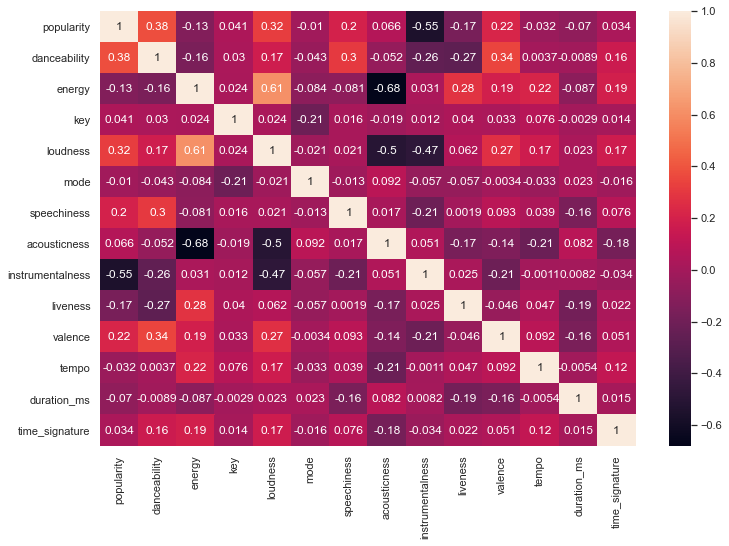

In [86]:
'''Song trend by visualize correlation'''

correlation = data[['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode','speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']].corr()

plt.figure(figsize=(12, 8))
sns.set(style='darkgrid')
sns.heatmap(correlation, annot=True)

In [87]:
data[['artist', 'energy', 'acousticness']].groupby('artist').mean().sort_values(by='energy', ascending=False)

,energy,acousticness
artist,,
Brent Rix,0.997000,0.004430
Allen Watts,0.996667,0.000530
Robbie Seed,0.996000,0.000025
Kobaryo,0.996000,0.011200
Whitesnake,0.995000,0.001070
...,...,...
Cool Vibes Jazz,0.073400,0.755000
Christopher McGinnis,0.053300,0.930000
Brad Mehldau,0.045500,0.996000


In [88]:
data['acousticness'].mean()

0.193794724596527